# Fuel Efficiency Assingment
## Adapted from TensorFlow Tutorials
#### Using the Boston Housing jupyter notebook as an example follow the prompts below to build a neural network to predict vehicle fuel efficiency

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

In [2]:
# Import the necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import backend
tf.random.set_seed(1234)

In [3]:
# Download the dataset
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")

In [4]:
# Add labels to columns and view dataset
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,1


In [5]:
# Vehicle orgin needs to be encoded to factors.  
origin = dataset.pop('Origin')
dataset['USA'] = (origin == 1)*1.0
dataset['Europe'] = (origin == 2)*1.0
dataset['Japan'] = (origin == 3)*1.0
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [6]:
# Check for missing data
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
USA             0
Europe          0
Japan           0
dtype: int64

In [7]:
# Remove missing data
dataset = dataset.dropna()

In [8]:
# Validate missing data removal
dataset.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
USA             0
Europe          0
Japan           0
dtype: int64

In [9]:
# Split dataset into y tragets and remove the targets from the dataset.  We are predicting MPG (fuel efficiencey) so the targets are MPG
dataset_labels = dataset.pop('MPG')


In [10]:
# View the dataset
dataset.tail()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
393,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,4,97.0,52.0,2130.0,24.6,82,0.0,1.0,0.0
395,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [11]:
# View the labels
dataset_labels.tail()

393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: MPG, dtype: float64

In [12]:
# Spit the dataset into x_train, x_test, y_train, y_test.  
x_train, x_test, y_train, y_test = train_test_split(dataset, dataset_labels, test_size=0.2, shuffle= True)


In [13]:
description_train = x_train.describe().transpose()
description_test= x_test.describe().transpose()
print(description_train)
print(description_test)

              count         mean         std  ...     50%     75%     max
Cylinders     313.0     5.466454    1.692648  ...     4.0     8.0     8.0
Displacement  313.0   193.132588  102.926407  ...   151.0   260.0   455.0
Horsepower    313.0   104.089457   37.985637  ...    94.0   122.0   230.0
Weight        313.0  2987.856230  855.129272  ...  2855.0  3632.0  5140.0
Acceleration  313.0    15.610543    2.759782  ...    15.5    17.1    24.8
Model Year    313.0    75.952077    3.654239  ...    76.0    79.0    82.0
USA           313.0     0.610224    0.488480  ...     1.0     1.0     1.0
Europe        313.0     0.188498    0.391736  ...     0.0     0.0     1.0
Japan         313.0     0.201278    0.401597  ...     0.0     0.0     1.0

[9 rows x 8 columns]
              count         mean         std  ...     50%     75%     max
Cylinders      79.0     5.493671    1.767755  ...     4.0     8.0     8.0
Displacement   79.0   199.481013  111.732953  ...   140.0   307.0   455.0
Horsepower     7

In [14]:
# Normalize the data by subratcing the mean from each feature and divid by one standard deviation
mean = x_train.mean(axis = 0)
x_train -= mean

std = x_train.std(axis = 0)
x_train /= std

x_test -= mean
x_test /= std

In [15]:
# View training data
x_train.tail()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
183,-0.866367,-0.749396,-0.607847,-0.897942,0.467231,0.013114,-1.249229,2.071553,-0.501193
130,-0.866367,-0.691101,-0.634173,-0.627807,0.322292,-0.534195,0.797937,-0.481187,-0.501193
116,1.496795,2.009858,3.314688,1.508712,-2.214140,-0.807850,0.797937,-0.481187,-0.501193
198,-0.866367,-0.992288,-1.344968,-1.394943,0.648405,0.013114,-1.249229,-0.481187,1.988863
380,-0.866367,-0.710533,-0.423567,-0.968107,-0.402403,1.655043,-1.249229,-0.481187,1.988863


In [16]:
# View testing data
x_test.tail()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
190,1.496795,1.533789,1.261280,1.435039,-1.018393,0.013114,0.797937,-0.481187,-0.501193
147,-0.866367,-1.002003,-0.765801,-1.028916,-0.040055,-0.534195,-1.249229,2.071553,-0.501193
3,1.496795,1.077152,1.208629,0.520557,-1.308271,-1.628814,0.797937,-0.481187,-0.501193
282,-0.866367,-0.516219,-0.423567,-0.114434,0.612170,0.834079,0.797937,-0.481187,-0.501193
335,-0.866367,-0.691101,-0.423567,-0.570506,-0.184994,1.107733,-1.249229,2.071553,-0.501193


In [17]:
# Built a sequential neural network model.  Start with backend.clear_session()
# Think about what activation function you will use, the input shape, number of nodes, and output shape and activation
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (len(x_train.keys()),)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(1))

In [18]:
# Compile the model.  Use 'adam' optimizer.  Think about what loss function and metrics you need to use for a regression problem
model.compile(optimizer = 'RMSprop', loss  = 'mse', metrics=['mae'])

In [19]:
# Validation Split
p_x_train, x_valid, p_y_train, y_valid = train_test_split(x_train, y_train, test_size=0.2, shuffle= True)

In [20]:
# Fit the model.  Use 1000 epochs.  Add a validation spit to your model.  Set verbose = 0.
nn = model.fit(p_x_train,
                   p_y_train,
                   epochs = 1000,
                   batch_size=100,
                   validation_data=(x_valid, y_valid),
                   verbose = 0)

In [21]:
# Use this bit of code to view the History output.
hist = pd.DataFrame(nn.history)
print(hist.tail())

         loss       mae  val_loss   val_mae
995  2.422738  1.070682  7.462370  2.034823
996  2.248950  0.995021  7.414842  2.022573
997  2.223984  0.986277  7.471417  2.046267
998  2.279603  0.995987  7.379658  2.050990
999  2.205246  0.963103  7.349053  1.997368


In [22]:
#Plot the loss and MAE vs epochs
import matplotlib.pyplot as plt
history_dict = nn.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
acc_values = history_dict['mae']
val_acc_values = history_dict['val_mae']
epochs = range(1, len(history_dict['mae']) + 1)

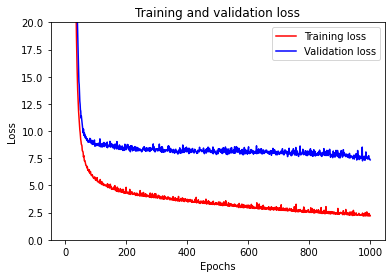

In [23]:
# Use the Boston Housing example to plot the validataion and training loss vs epochs
plt.plot(epochs, loss_values, 'r', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.ylim(0,20)
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

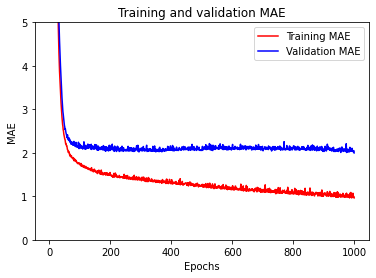

In [24]:
# Use the Boston Housing example to plot the validataion and training mean absolute error vs epochs
plt.plot(epochs, acc_values, 'r', label = 'Training MAE')
plt.plot(epochs, val_acc_values, 'b', label = 'Validation MAE')
plt.ylim(0,5)
plt.title('Training and validation MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [25]:
# Evaluate the model on the test data and print the results
results = model.evaluate(x_test, y_test)
print(results)
print(model.metrics_names)

3/3 [==============================] - 0s 2ms/step - loss: 11.7530 - mae: 2.4496
[11.752970695495605, 2.4495508670806885]
['loss', 'mae']


In [29]:
# Clear your session using this command: backend.clear_session() 
# Things to try: more hidden layers and hiddent units, activation types, epochs, batch size, and validation_split.
# Try as many models as you like.  Be sure to clear the session each time.  backend.clear_session() 

# Increase hidden units
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (len(x_train.keys()),)))
model.add(layers.Dense(128, activation = 'relu')) # Increased to 128
model.add(layers.Dense(1))
model.compile(optimizer = 'RMSprop', loss  = 'mse', metrics=['mae'])
nn = model.fit(x_train,
                   y_train,
                   epochs = 1000,
                   batch_size=100,
                   verbose = 0)
results = model.evaluate(x_test, y_test)
print(results)
print(model.metrics_names)

3/3 [==============================] - 0s 2ms/step - loss: 10.5488 - mae: 2.2129
[10.548754692077637, 2.2129359245300293]
['loss', 'mae']


The loss and the mae decreased with an increase in the hidden units

In [30]:
# Change Optimizer
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (len(x_train.keys()),)))
model.add(layers.Dense(128, activation = 'relu')) # Increased to 128
model.add(layers.Dense(1))
model.compile(optimizer = 'adam', loss  = 'mse', metrics=['mae'])
nn = model.fit(x_train,
                   y_train,
                   epochs = 1000,
                   batch_size=100,
                   verbose = 0)
results = model.evaluate(x_test, y_test)
print(results)
print(model.metrics_names)

3/3 [==============================] - 0s 3ms/step - loss: 9.8428 - mae: 2.1403
[9.842799186706543, 2.1402761936187744]
['loss', 'mae']


The adam optimizer performed slightly better than the rmrprop optimzier

In [37]:
# Change epochs
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (len(x_train.keys()),)))
model.add(layers.Dense(128, activation = 'relu')) # Increased to 128
model.add(layers.Dense(1))
model.compile(optimizer = 'adam', loss  = 'mse', metrics=['mae'])
nn = model.fit(x_train,
                   y_train,
                   epochs = 100,
                   batch_size=100,
                   verbose = 0)
results = model.evaluate(x_test, y_test)
print(results)
print(model.metrics_names)

3/3 [==============================] - 0s 3ms/step - loss: 9.1478 - mae: 2.0425
[9.147751808166504, 2.042546272277832]
['loss', 'mae']


The loss and the mae further decreased with epochs set to 100

In [40]:
# Add additional hidden layers
backend.clear_session()
model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (len(x_train.keys()),)))
model.add(layers.Dense(128, activation = 'relu')) # Increased to 128
model.add(layers.Dense(128, activation = 'relu')) # Added Layer
model.add(layers.Dense(1))
model.compile(optimizer = 'adam', loss  = 'mse', metrics=['mae'])
nn = model.fit(x_train,
                   y_train,
                   epochs = 100,
                   batch_size=100,
                   verbose = 0)
results = model.evaluate(x_test, y_test)
print(results)
print(model.metrics_names)

3/3 [==============================] - 0s 2ms/step - loss: 9.3086 - mae: 2.1917
[9.30856704711914, 2.1917030811309814]
['loss', 'mae']


The additional layers incrased the loss and mae, this is not what we want